In [2]:
import numpy as np 
import torch
import torch.distributions as dist
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
dice = dist.Categorical(probs=torch.tensor([1/6]*6))

# Sample N dice rolls
N = 1000

rolls = dice.sample((N,)) + 1
# 1 is added to the sample because the sample is 0-indexed

In [4]:
rolls[:10]

tensor([2, 1, 6, 4, 5, 3, 3, 3, 1, 3])

Text(0.5, 0, 'Roll number')

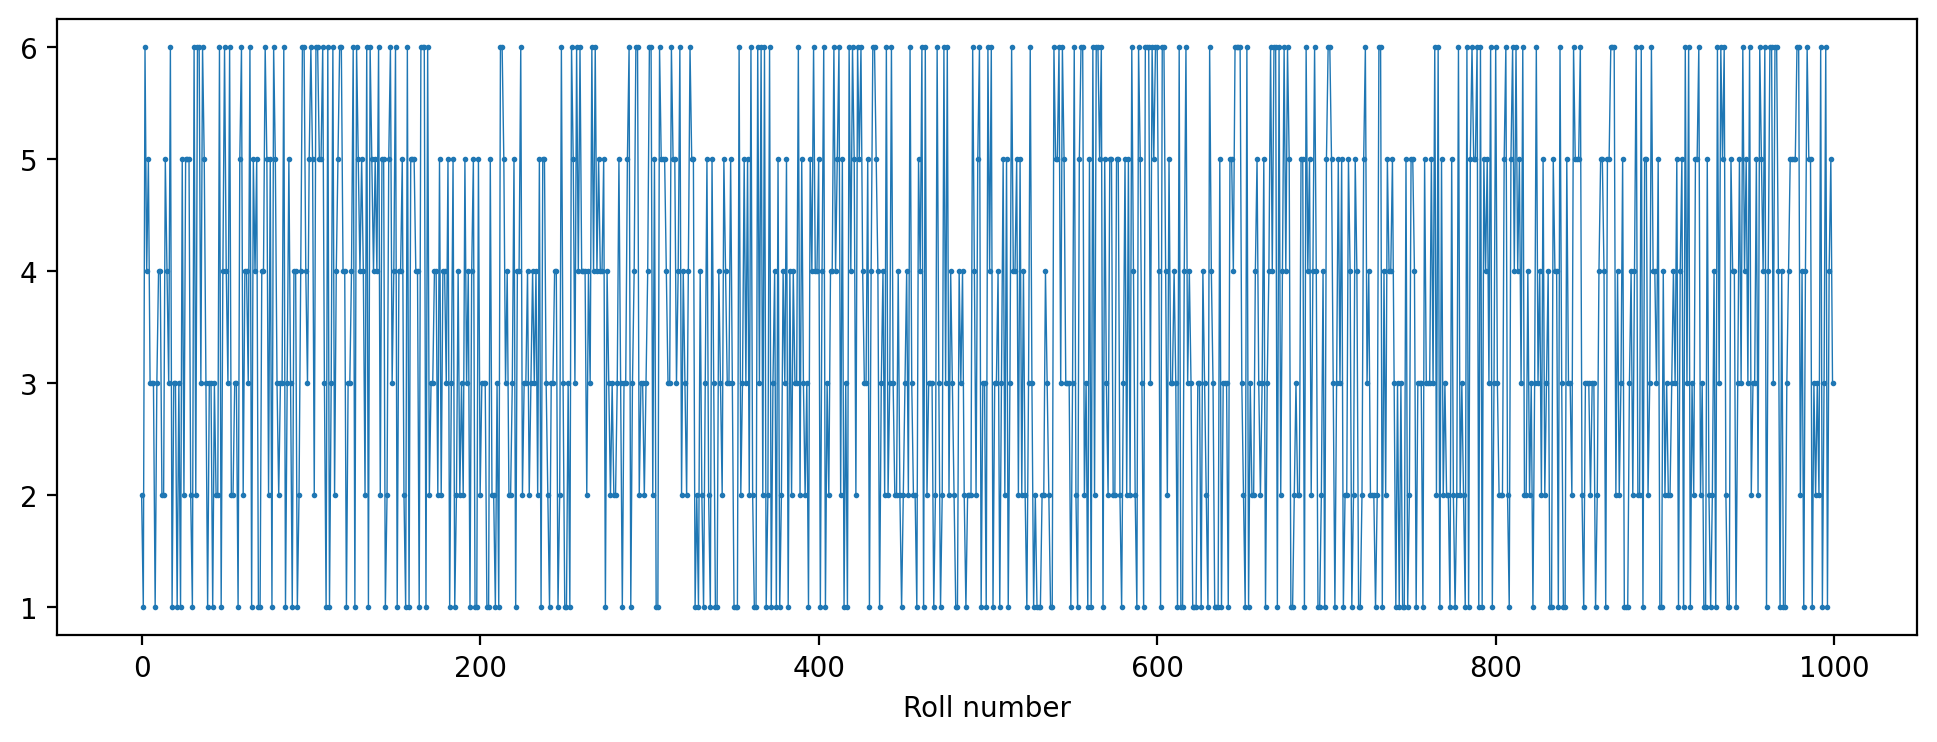

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(rolls, lw=0.5, marker='o', markersize=1)
ax.set_xlabel('Roll number')

In [6]:
pd.Series(rolls).value_counts().sort_index()

1    180
2    160
3    187
4    146
5    159
6    168
Name: count, dtype: int64

In [7]:
# Running average
runing_avg = torch.cumsum(rolls, dim=0) / torch.arange(1, N+1)


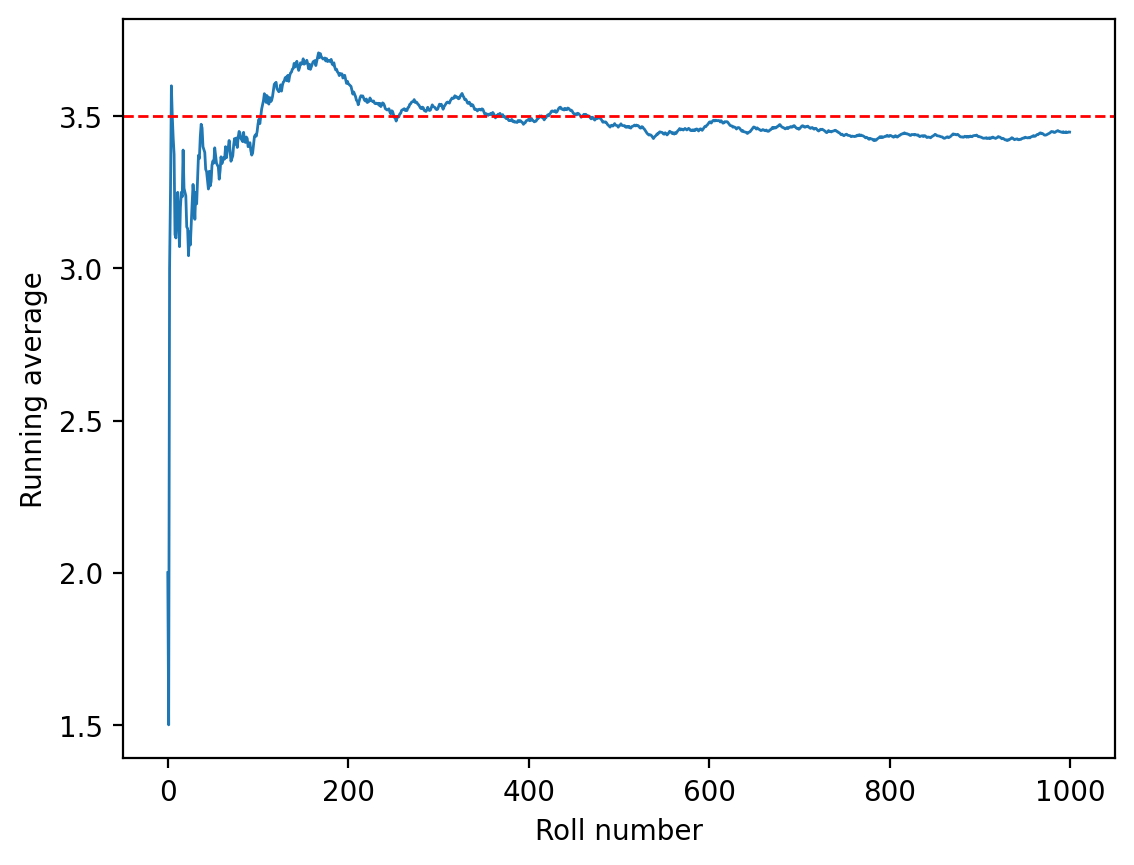

In [8]:
plt.plot(runing_avg, lw=1)
plt.xlabel('Roll number')
plt.ylabel('Running average')
plt.axhline(3.5, color='red', lw=1, ls='--')

In [9]:
def compute_running_avg(N):
    rolls = dice.sample((N,)) + 1
    runing_avg = torch.cumsum(rolls, dim=0) / torch.arange(1, N+1)
    return runing_avg


In [10]:
dist = torch.distributions.Bernoulli(probs=0.5)
samples = dist.sample((100,))

In [11]:
samples.mean()

tensor(0.4900)

In [12]:
pd.Series(samples.numpy()).value_counts()

0.0    51
1.0    49
Name: count, dtype: int64

In [13]:
# Game of winning and losing money based on a coin flip

In [14]:
win_amt = 2000
loss_amt = -2000
total_count_N = 100 # Number of coin flips

dist = torch.distributions.Binomial(total_count_N, probs=0.5)

In [15]:
num_samples = 5000 # number of players/Number of times we perform total_count_N coin flips

In [16]:
num_times_wins_across_samples = dist.sample((num_samples,))

In [17]:
num_times_wins_across_samples[:100]

tensor([50., 54., 51., 50., 55., 48., 46., 57., 47., 48., 50., 57., 52., 44.,
        52., 48., 45., 56., 49., 51., 45., 54., 51., 50., 48., 58., 43., 43.,
        55., 50., 50., 52., 47., 42., 45., 50., 56., 55., 57., 46., 65., 52.,
        50., 58., 53., 50., 61., 46., 54., 51., 49., 46., 43., 53., 56., 55.,
        53., 48., 49., 45., 60., 52., 54., 50., 59., 52., 51., 41., 51., 59.,
        40., 56., 55., 55., 50., 49., 47., 54., 51., 51., 49., 51., 58., 54.,
        52., 64., 60., 51., 55., 45., 45., 42., 50., 43., 42., 51., 43., 55.,
        48., 60.])

In [18]:
if num_samples<=50:
    fig, ax = plt.subplots(figsize=(12, 4))
    pd.Series(num_times_wins_across_samples.numpy()).plot(kind='bar', rot=0, ax=ax)
    plt.xlabel('Sample number')
    plt.ylabel('Number of wins')

In [19]:
net_money_won = num_times_wins_across_samples * win_amt + (total_count_N - num_times_wins_across_samples) * loss_amt
net_money_won_series = pd.Series(net_money_won.numpy())

In [20]:
net_money_won_series

0           0.0
1       16000.0
2        4000.0
3           0.0
4       20000.0
         ...   
4995   -24000.0
4996    16000.0
4997   -16000.0
4998   -40000.0
4999        0.0
Length: 5000, dtype: float32

In [21]:
if num_samples<=50:
    fig, ax = plt.subplots(figsize=(12, 4))
    net_money_won_series.plot(kind='bar', rot=0, ax=ax)
    ax.axhline(0, color='red', lw=1, ls='--')


<Axes: >

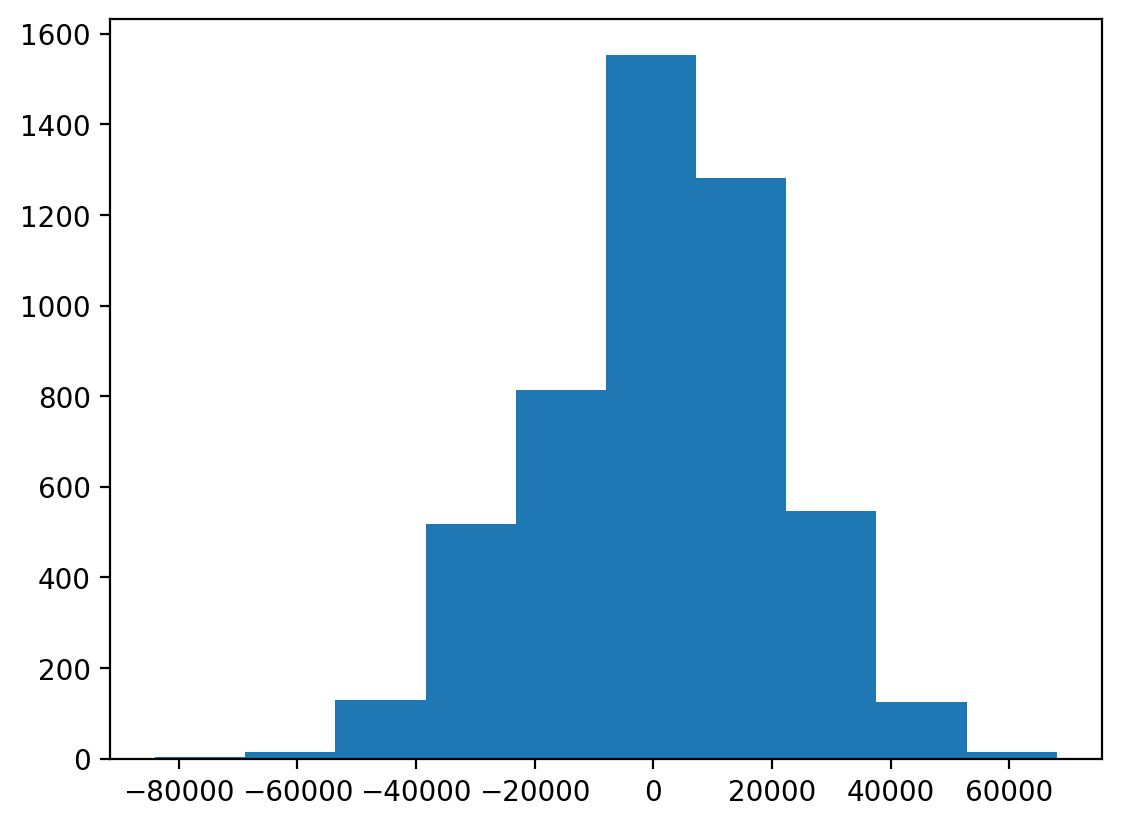

In [22]:
net_money_won_series.hist(grid=False)

In [23]:
net_money_won_series.mean()

np.float32(409.6)

In [24]:
net_money_won_series.var()

np.float32(399822600.0)

In [25]:
net_money_won_series.var()/((win_amt**2) * total_count_N)

np.float32(0.9995565)

In [26]:
# same analysis but starting from Bernoulli distribution

In [27]:
win_amt = 2000
loss_amt = -2000
total_count_N = 100 # Number of coin flips

In [28]:
# Simulate game
dist = torch.distributions.Bernoulli(probs=0.5)

In [29]:
overall_samples = dist.sample(torch.Size([num_samples, total_count_N]))

In [30]:
overall_samples.shape

torch.Size([5000, 100])

In [31]:
overall_samples_df = pd.DataFrame(overall_samples.numpy())

In [32]:
overall_samples_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


In [33]:
# win and loss -- replace 0 with -2000 and 1 with 2000
win_amount_df = overall_samples_df.replace({0: loss_amt, 1: win_amt})
win_amount_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,2000.0,2000.0,-2000.0,2000.0,...,2000.0,-2000.0,2000.0,2000.0,-2000.0,2000.0,2000.0,-2000.0,-2000.0,2000.0
1,2000.0,-2000.0,-2000.0,2000.0,2000.0,-2000.0,-2000.0,-2000.0,2000.0,2000.0,...,-2000.0,-2000.0,2000.0,2000.0,2000.0,-2000.0,2000.0,2000.0,2000.0,-2000.0
2,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,2000.0,-2000.0,2000.0,...,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,-2000.0,2000.0
3,-2000.0,-2000.0,2000.0,-2000.0,-2000.0,-2000.0,-2000.0,2000.0,-2000.0,-2000.0,...,2000.0,-2000.0,-2000.0,2000.0,-2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
4,2000.0,-2000.0,-2000.0,2000.0,2000.0,-2000.0,-2000.0,2000.0,-2000.0,2000.0,...,2000.0,-2000.0,2000.0,2000.0,-2000.0,2000.0,2000.0,2000.0,2000.0,2000.0


In [34]:
# Net money won
net_money_won = win_amount_df.sum(axis=1)
net_money_won

0      -16000.0
1       -4000.0
2      -16000.0
3           0.0
4       16000.0
         ...   
4995    12000.0
4996    -8000.0
4997    -4000.0
4998   -20000.0
4999    -8000.0
Length: 5000, dtype: float32

<Axes: >

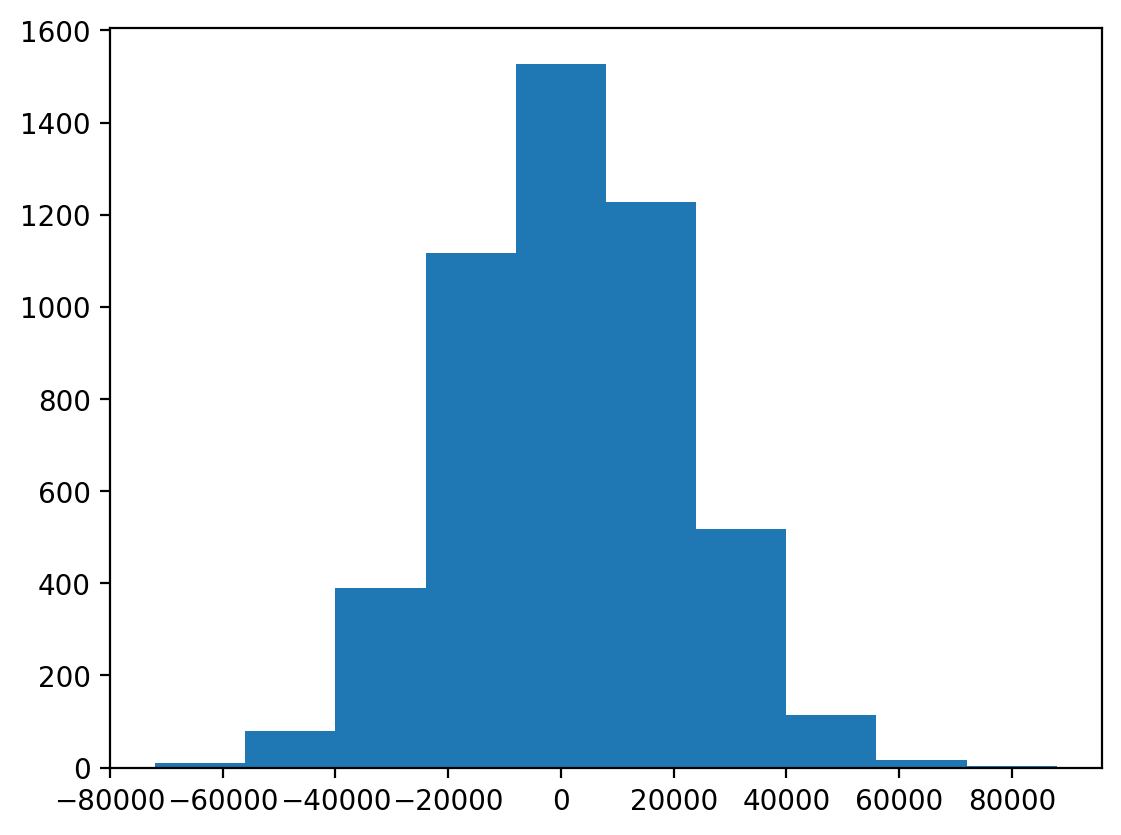

In [35]:
net_money_won.hist(grid=False)

In [36]:
net_money_won.var()

np.float32(402282200.0)

In [37]:
net_money_won.mean()

np.float32(-329.6)

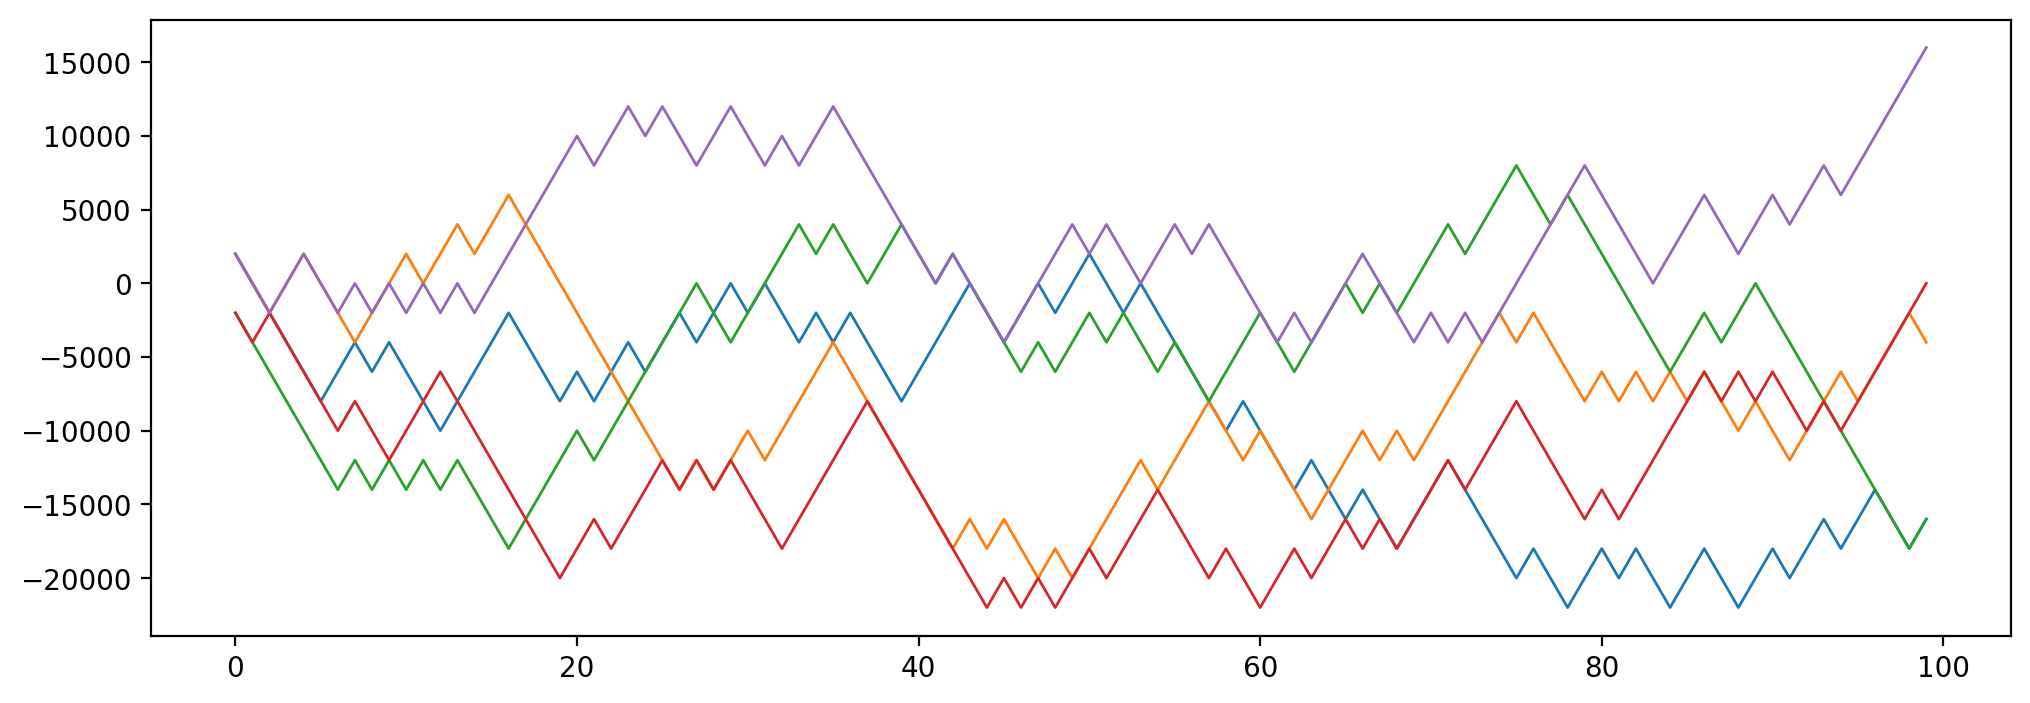

In [38]:
# Plotting cumulative sum of net money won for first 5 players
fig, ax = plt.subplots(figsize=(12, 4))
for i in range(5):
    #win_amount_df.iloc[i].values.cumsum()
    ax.plot(win_amount_df.iloc[i].values.cumsum(), lw=1)

In [39]:
cumsum_df = win_amount_df.cumsum(axis=1)
cumsum_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,2000.0,0.0,-2000.0,-4000.0,-6000.0,-8000.0,-6000.0,-4000.0,-6000.0,-4000.0,...,-18000.0,-20000.0,-18000.0,-16000.0,-18000.0,-16000.0,-14000.0,-16000.0,-18000.0,-16000.0
1,2000.0,0.0,-2000.0,0.0,2000.0,0.0,-2000.0,-4000.0,-2000.0,0.0,...,-10000.0,-12000.0,-10000.0,-8000.0,-6000.0,-8000.0,-6000.0,-4000.0,-2000.0,-4000.0
2,-2000.0,-4000.0,-6000.0,-8000.0,-10000.0,-12000.0,-14000.0,-12000.0,-14000.0,-12000.0,...,-2000.0,-4000.0,-6000.0,-8000.0,-10000.0,-12000.0,-14000.0,-16000.0,-18000.0,-16000.0
3,-2000.0,-4000.0,-2000.0,-4000.0,-6000.0,-8000.0,-10000.0,-8000.0,-10000.0,-12000.0,...,-6000.0,-8000.0,-10000.0,-8000.0,-10000.0,-8000.0,-6000.0,-4000.0,-2000.0,0.0
4,2000.0,0.0,-2000.0,0.0,2000.0,0.0,-2000.0,0.0,-2000.0,0.0,...,6000.0,4000.0,6000.0,8000.0,6000.0,8000.0,10000.0,12000.0,14000.0,16000.0


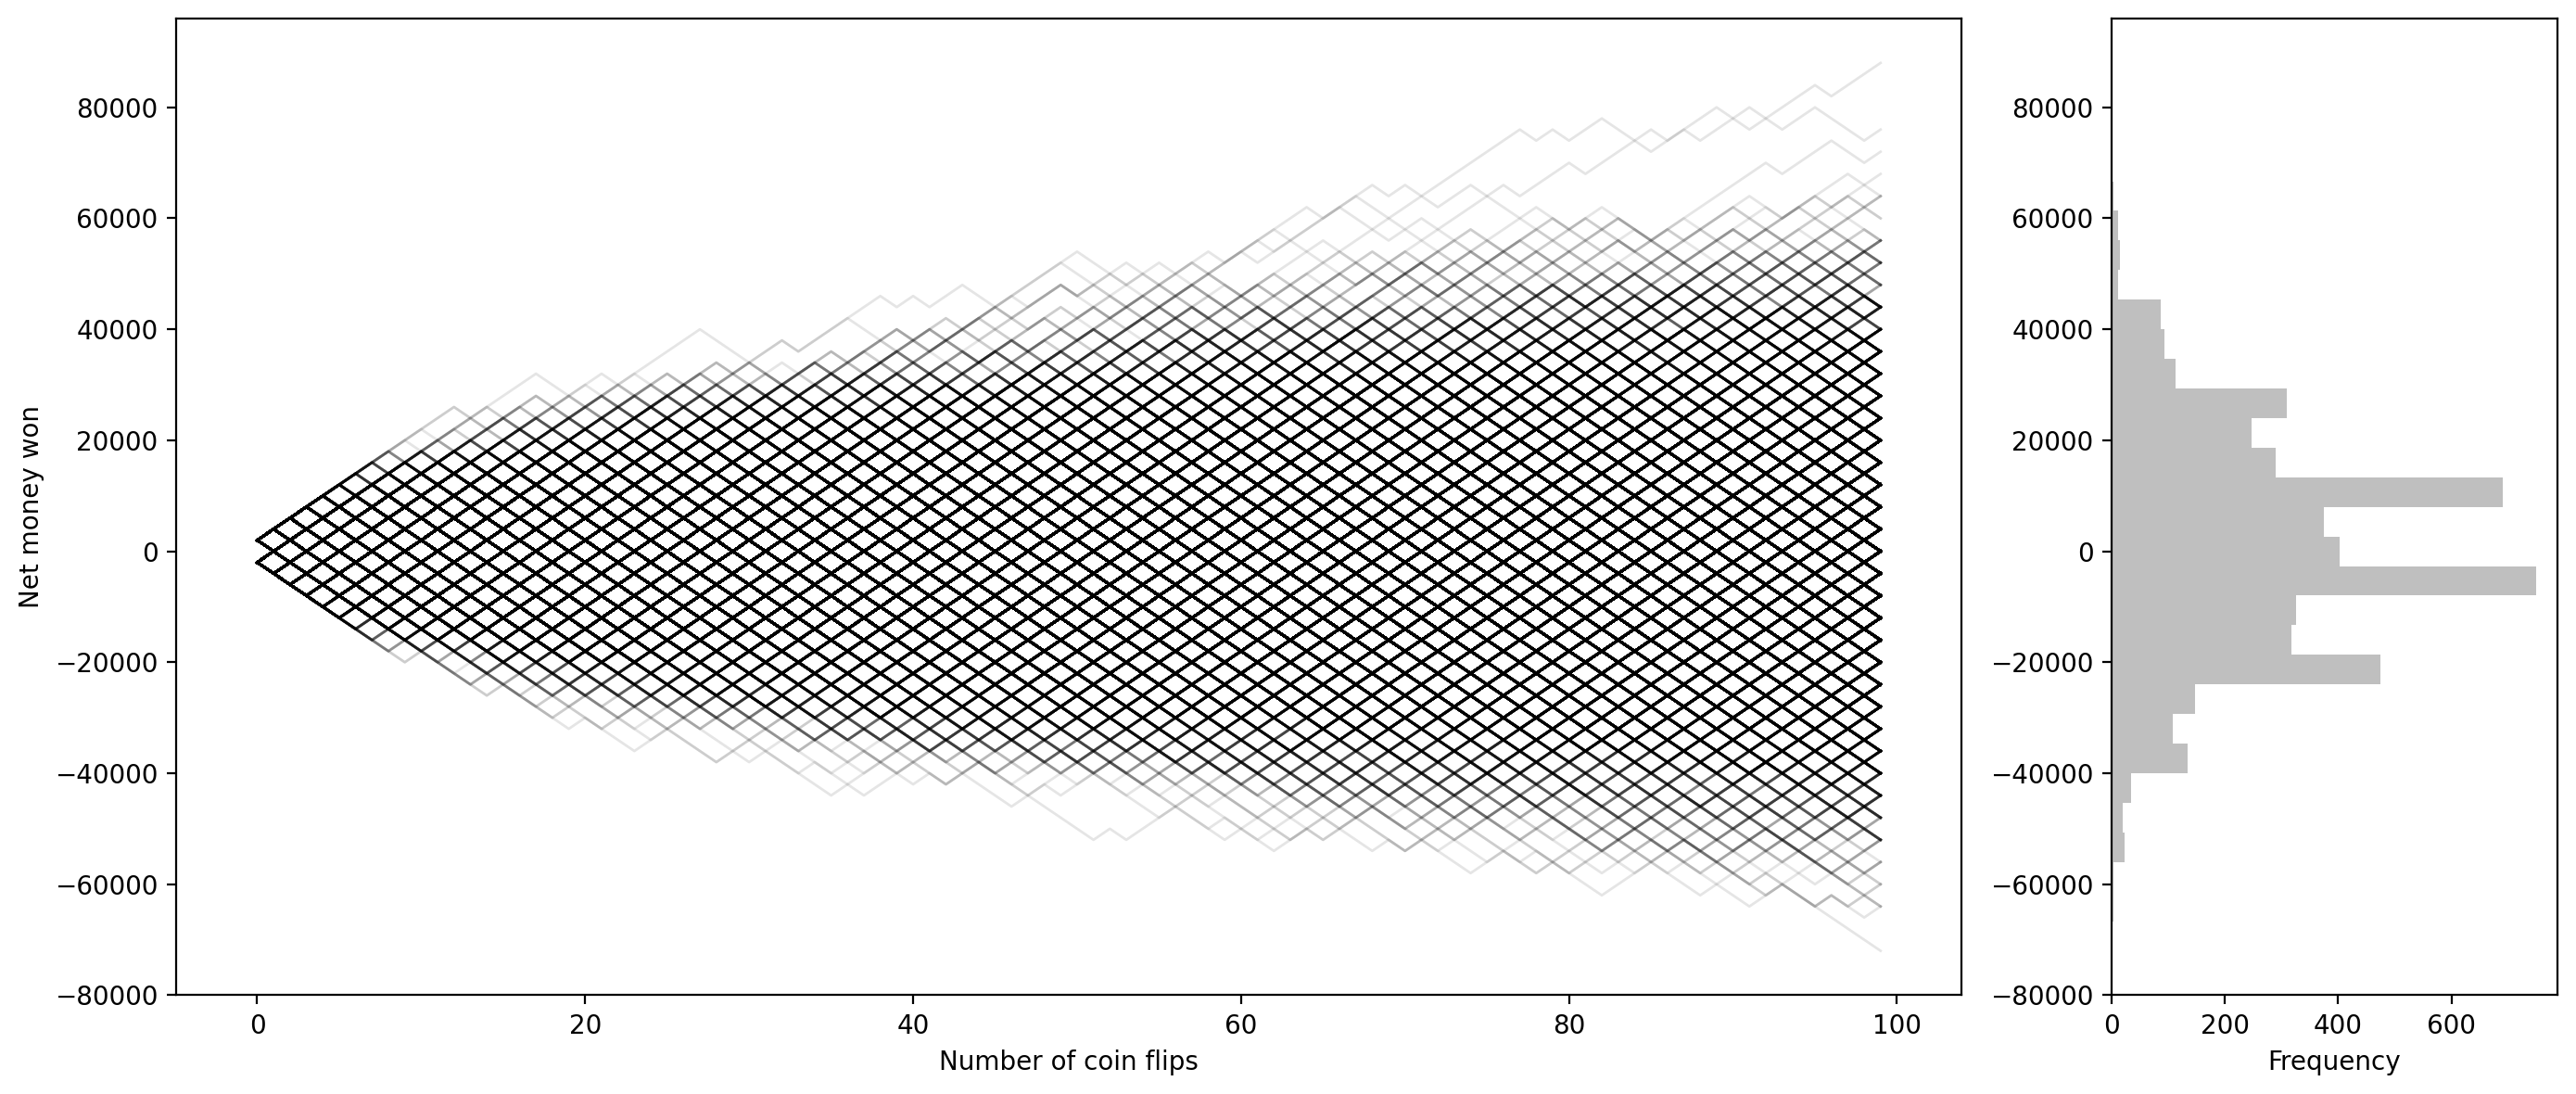

In [56]:
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[4, 1])  # 4:1 ratio for main plot and histogram

# Main plot (left plot for cumulative sum)
ax1 = fig.add_subplot(gs[0])
cumsum_df = win_amount_df.cumsum(axis=1)
cumsum_df.T.plot(legend=False, lw=1, alpha=0.1, color='k', ax=ax1)
ax1.set_xlabel("Number of coin flips")
ax1.set_ylabel("Net money won")

# Right plot (histogram)
ax2 = fig.add_subplot(gs[1])
ax2.hist(net_money_won, color='gray', alpha=0.5, orientation='horizontal', bins=30)
ax2.set_xlabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.savefig('coin_flip_game.png', dpi=600)

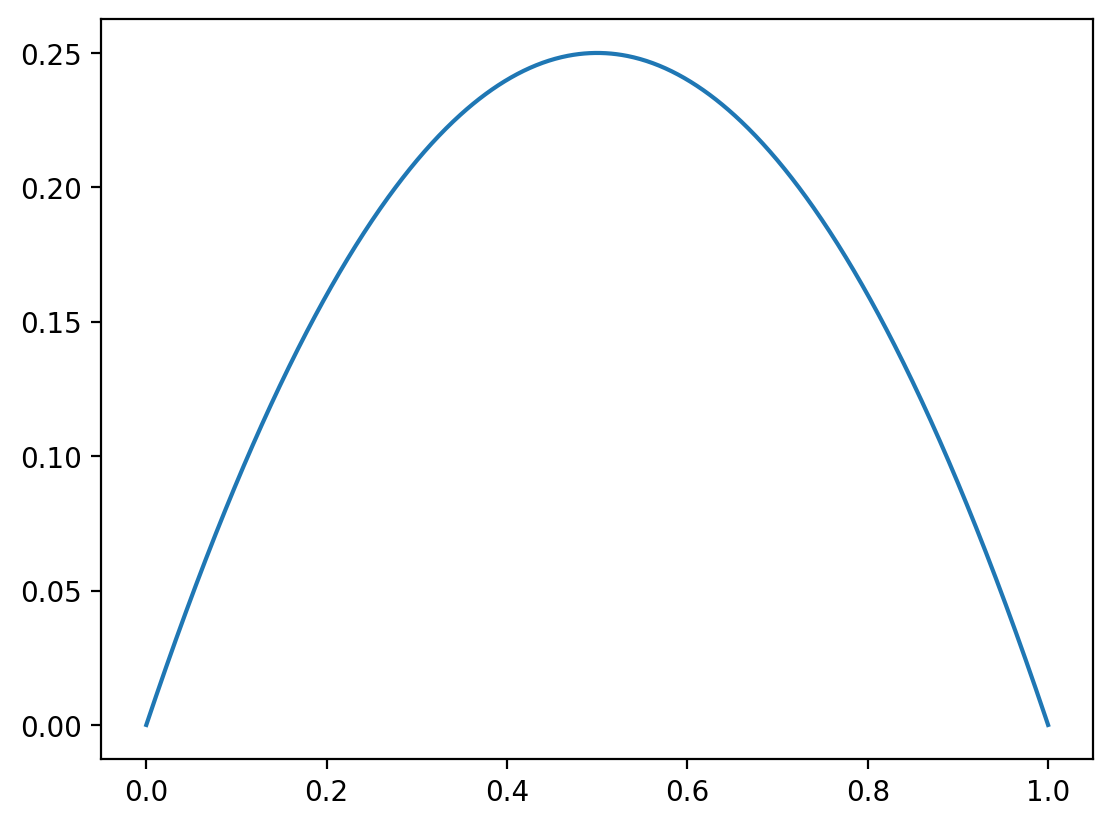

In [35]:
p = np.linspace(0, 1, 1000)

plt.plot(p, p*(1-p), label='p(1-p)')

In [11]:
p = 0.5
dist = torch.distributions.Binomial(total_count=2, probs=p)

In [27]:
N = 100000000
samples = dist.sample((N,))

In [28]:
samples.mean().item()

0.9999343752861023